# 1.4

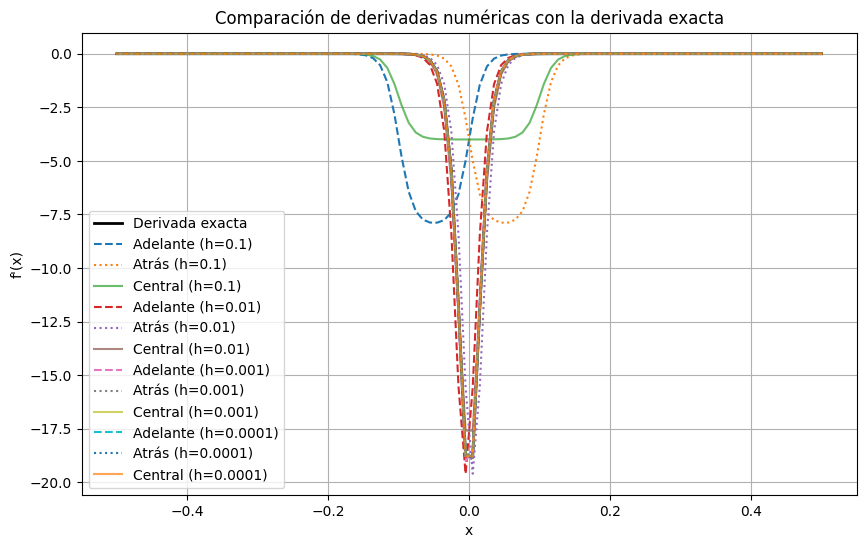

Comparación de derivadas en x = 0.0
---------------------------------
Derivada exacta: -20.0
---------------------------------
Para h = 0.1:
  - Derivada hacia adelante: -3.9996368170503804
  - Derivada hacia atrás:    -3.9996368170503804
  - Derivada central:        -3.9996368170503804
  - Derivada de 4 puntos:    -4.666182425482044
---------------------------------
Para h = 0.01:
  - Derivada hacia adelante: -18.484686290400386
  - Derivada hacia atrás:    -18.484686290400386
  - Derivada central:        -18.484686290400386
  - Derivada de 4 puntos:    -19.568954014162085
---------------------------------
Para h = 0.001:
  - Derivada hacia adelante: -19.98334998315199
  - Derivada hacia atrás:    -19.98334998315199
  - Derivada central:        -19.98334998315199
  - Derivada de 4 puntos:    -19.999933669205603
---------------------------------
Para h = 0.0001:
  - Derivada hacia adelante: -19.99983333500044
  - Derivada hacia atrás:    -19.99983333500044
  - Derivada central:        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -0.4 * np.tanh(50 * x) + 0.6

def f_prima_exacta(x):
    return -0.4 * (50 / np.cosh(50 * x)**2)

def derivada_adelante(f, x, h):
    return (f(x + h) - f(x)) / h

def derivada_atras(f, x, h):
    return (f(x) - f(x - h)) / h

def derivada_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def derivada_4puntos(f, x, h):
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

x = np.linspace(-0.5, 0.5, 100) 

h_values = [0.1, 0.01, 0.001, 0.0001]

plt.figure(figsize=(10, 6))
plt.plot(x, f_prima_exacta(x), 'k-', linewidth=2, label='Derivada exacta')

for h in h_values:
    derivada_adelante_val = derivada_adelante(f, x, h)
    derivada_atras_val = derivada_atras(f, x, h)
    derivada_central_val = derivada_central(f, x, h)
    plt.plot(x, derivada_adelante_val, '--', label=f'Adelante (h={h})')
    plt.plot(x, derivada_atras_val, ':', label=f'Atrás (h={h})')
    plt.plot(x, derivada_central_val, '-', alpha=0.7, label=f'Central (h={h})')

plt.title("Comparación de derivadas numéricas con la derivada exacta")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend()
plt.grid(True)
plt.show()

x_punto = 0.0

print(f"Comparación de derivadas en x = {x_punto}")
print("---------------------------------")
print(f"Derivada exacta: {f_prima_exacta(x_punto)}")
print("---------------------------------")

for h in h_values:
    print(f"Para h = {h}:")
    print(f"  - Derivada hacia adelante: {derivada_adelante(f, x_punto, h)}")
    print(f"  - Derivada hacia atrás:    {derivada_atras(f, x_punto, h)}")
    print(f"  - Derivada central:        {derivada_central(f, x_punto, h)}")
    print(f"  - Derivada de 4 puntos:    {derivada_4puntos(f, x_punto, h)}")
    print("---------------------------------")

# 1.5

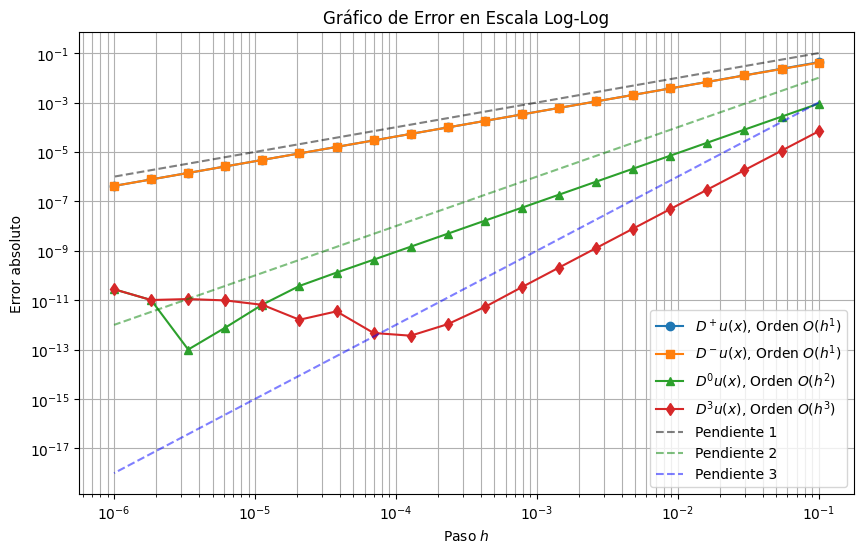

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def u(x):
    return np.sin(x)

def u_prima_exacta(x):
    return np.cos(x)

def D_plus(u, x, h):
    return (u(x + h) - u(x)) / h

def D_minus(u, x, h):
    return (u(x) - u(x - h)) / h

def D_0(u, x, h):
    return (u(x + h) - u(x - h)) / (2 * h)

def D_3(u, x, h):
    return (2 * u(x + h) + 3 * u(x) - 6 * u(x - h) + u(x - 2 * h)) / (6 * h)

x_eval = 1.0 
h_values = np.logspace(-1, -6, 20)  

error_D_plus = np.abs(D_plus(u, x_eval, h_values) - u_prima_exacta(x_eval))
error_D_minus = np.abs(D_minus(u, x_eval, h_values) - u_prima_exacta(x_eval))
error_D_0 = np.abs(D_0(u, x_eval, h_values) - u_prima_exacta(x_eval))
error_D_3 = np.abs(D_3(u, x_eval, h_values) - u_prima_exacta(x_eval))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, error_D_plus, 'o-', label=r'$D^+u(x)$, Orden $O(h^1)$')
plt.loglog(h_values, error_D_minus, 's-', label=r'$D^-u(x)$, Orden $O(h^1)$')
plt.loglog(h_values, error_D_0, '^-', label=r'$D^0u(x)$, Orden $O(h^2)$')
plt.loglog(h_values, error_D_3, 'd-', label=r'$D^3u(x)$, Orden $O(h^3)$')

plt.loglog(h_values, h_values, 'k--', alpha=0.5, label='Pendiente 1')
plt.loglog(h_values, h_values**2, 'g--', alpha=0.5, label='Pendiente 2')
plt.loglog(h_values, h_values**3, 'b--', alpha=0.5, label='Pendiente 3')

plt.title('Gráfico de Error en Escala Log-Log')
plt.xlabel('Paso $h$')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()